#  Selected molecular descriptors from the Dragon chemoinformatics application were used to predict bioconcentration factors for 779 chemicals in order to evaluate QSAR (Quantitative Structure Activity Relationship). This dataset was obtained from the UCI machine learning repository. The dataset consists of 779 observations of 10 attributes. 
# Below is a brief description of each feature and the response variable logBCF in our dataset
# 1.nHM- number of heavy atoms (integer) 
# 2.piPC09- molecular multiple path count (numeric) 
# 3.PCD- difference between multiple path count and path count (numeric) 
# 4.X2Av- average valence connectivity (numeric) 
# 5.MLOGP- Moriguchi octanol-water partition coefficient (numeric) 
# 6.ON1V- overall modified Zagreb index by valence vertex degrees (numeric) 
# 7.N.072- Frequency of RCO-N< / >N-X=X fragments (integer) 
# 8.B02[C-N]- Presence/Absence of C-N atom pairs (binary) 
# 9.F04[C-O]- Frequency of C-O atom pairs (integer) 
# 10.logBCF- Bioconcentration Factor in log units (numeric) 



***Note : Write inference whenever it is required.***

1. Import required Library 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


2. Read the dataset (tab, csv, xls, txt, inbuilt dataset) and display no of rows and columns in dataset.

In [5]:
import pandas as pd

# Read the dataset
df = pd.read_csv("data_project.csv", encoding='latin1')
# Display the number of rows and columns
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 779
Number of columns: 14


3. Display top five rows. 

In [6]:
import pandas as pd

# Read the dataset

# Display the top five rows
print(df.head())


       ÿCAS                              SMILES    Set  nHM  piPC09   PCD  \
0  100-02-7             O=[N+](c1ccc(cc1)O)[O-]  Train    0     0.0  1.49   
1  100-17-4            O=[N+](c1ccc(cc1)OC)[O-]  Train    0     0.0  1.47   
2  100-18-5                c1cc(ccc1C(C)C)C(C)C  Train    0     0.0  1.20   
3  100-25-4  O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-]  Train    0     0.0  1.69   
4  100-40-3                        C=CC1CCC=CC1  Train    0     0.0  0.52   

   X2Av  MLOGP  ON1V  N-072  B02[C-N]  F04[C-O]  Class  logBCF  
0  0.14   1.35  0.72      0         1         5      1    0.74  
1  0.14   1.70  0.88      0         1         5      1    0.93  
2  0.25   4.14  2.06      0         0         0      3    3.24  
3  0.13   1.89  0.79      0         1         8      3   -0.40  
4  0.25   2.65  1.31      0         0         0      1    2.24  


4.(a) Drop unnecessary columns(ÿCAS,SMILES,Set,Class). 
4.(b) Drop the Target variable

In [7]:
import pandas as pd

# Read the dataset
df = pd.read_csv("data_project.csv", encoding='latin1')

# Drop unnecessary columns
unnecessary_columns = ['ÿCAS', 'SMILES', 'Set', 'Class']
df.drop(columns=unnecessary_columns, inplace=True)

# Drop the Target variable
target_variable = 'logBCF'
df.drop(columns=target_variable, inplace=True)

# Display the updated DataFrame
print(df.head())


   nHM  piPC09   PCD  X2Av  MLOGP  ON1V  N-072  B02[C-N]  F04[C-O]
0    0     0.0  1.49  0.14   1.35  0.72      0         1         5
1    0     0.0  1.47  0.14   1.70  0.88      0         1         5
2    0     0.0  1.20  0.25   4.14  2.06      0         0         0
3    0     0.0  1.69  0.13   1.89  0.79      0         1         8
4    0     0.0  0.52  0.25   2.65  1.31      0         0         0


5.(a) Describe the dataset. 

In [8]:
import pandas as pd

# Read the dataset
df = pd.read_csv("data_project.csv", encoding='latin1')

# Drop unnecessary columns
unnecessary_columns = ['ÿCAS', 'SMILES', 'Set', 'Class']
df.drop(columns=unnecessary_columns, inplace=True)

# Drop the Target variable
target_variable = 'logBCF'
df.drop(columns=target_variable, inplace=True)

# Describe the dataset
description = df.describe()

# Display the description
print(description)


              nHM      piPC09         PCD        X2Av       MLOGP        ON1V  \
count  779.000000  779.000000  779.000000  779.000000  779.000000  779.000000   
mean     1.754814    3.467616    1.550822    0.236881    3.201746    1.510295   
std      1.985866    2.983778    0.958708    0.149319    1.595702    0.834753   
min      0.000000    0.000000    0.000000    0.090000   -1.960000    0.080000   
25%      0.000000    0.000000    1.210000    0.170000    2.190000    0.910000   
50%      1.000000    4.263000    1.400000    0.200000    3.130000    1.270000   
75%      3.000000    6.250000    2.285000    0.240000    4.235000    2.020000   
max     12.000000    9.316000    5.900000    2.230000    8.320000    7.190000   

            N-072    B02[C-N]    F04[C-O]  
count  779.000000  779.000000  779.000000  
mean     0.186136    0.423620    3.585366  
std      0.501937    0.494449    4.430421  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%   

5.(b)  Do proper EDA over dataset (5 Marks)

Missing Values:
 nHM         0
piPC09      0
PCD         0
X2Av        0
MLOGP       0
ON1V        0
N-072       0
B02[C-N]    0
F04[C-O]    0
dtype: int64


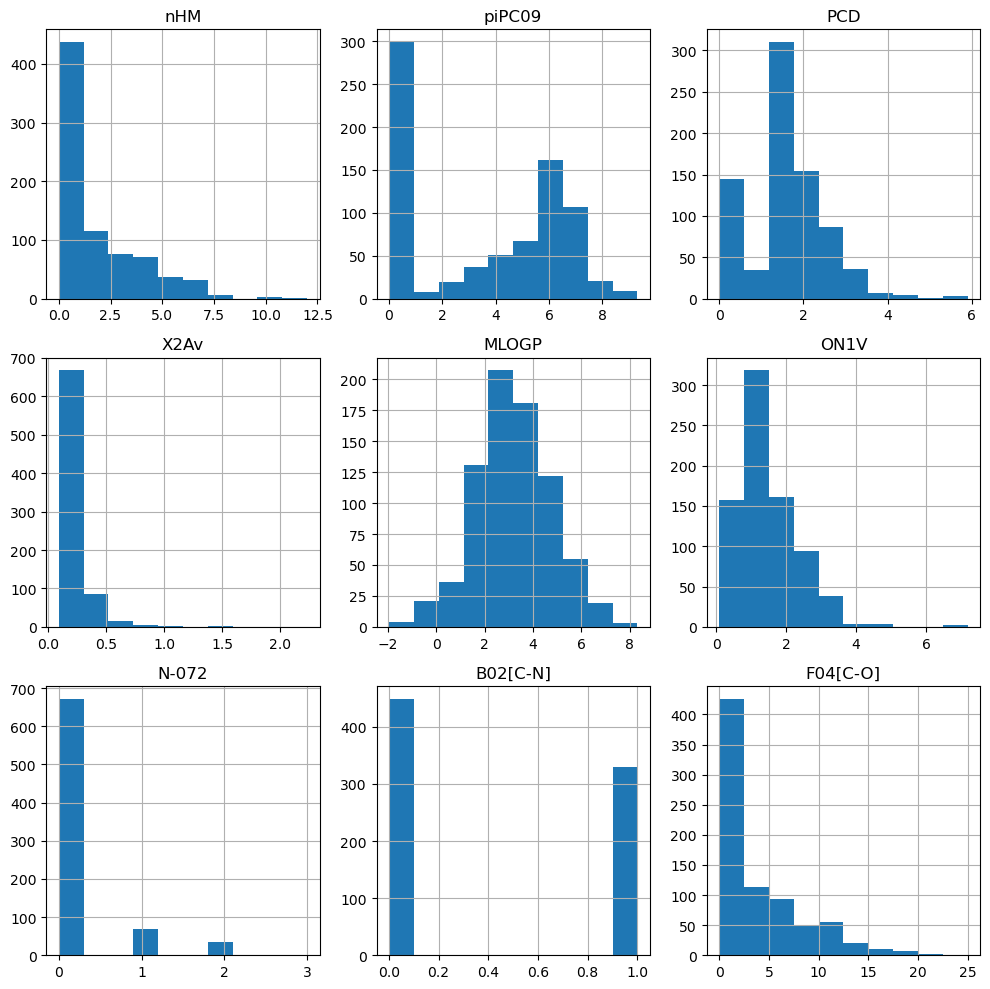

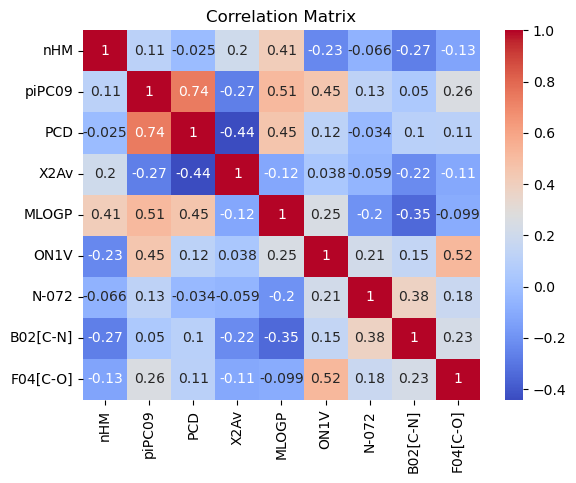

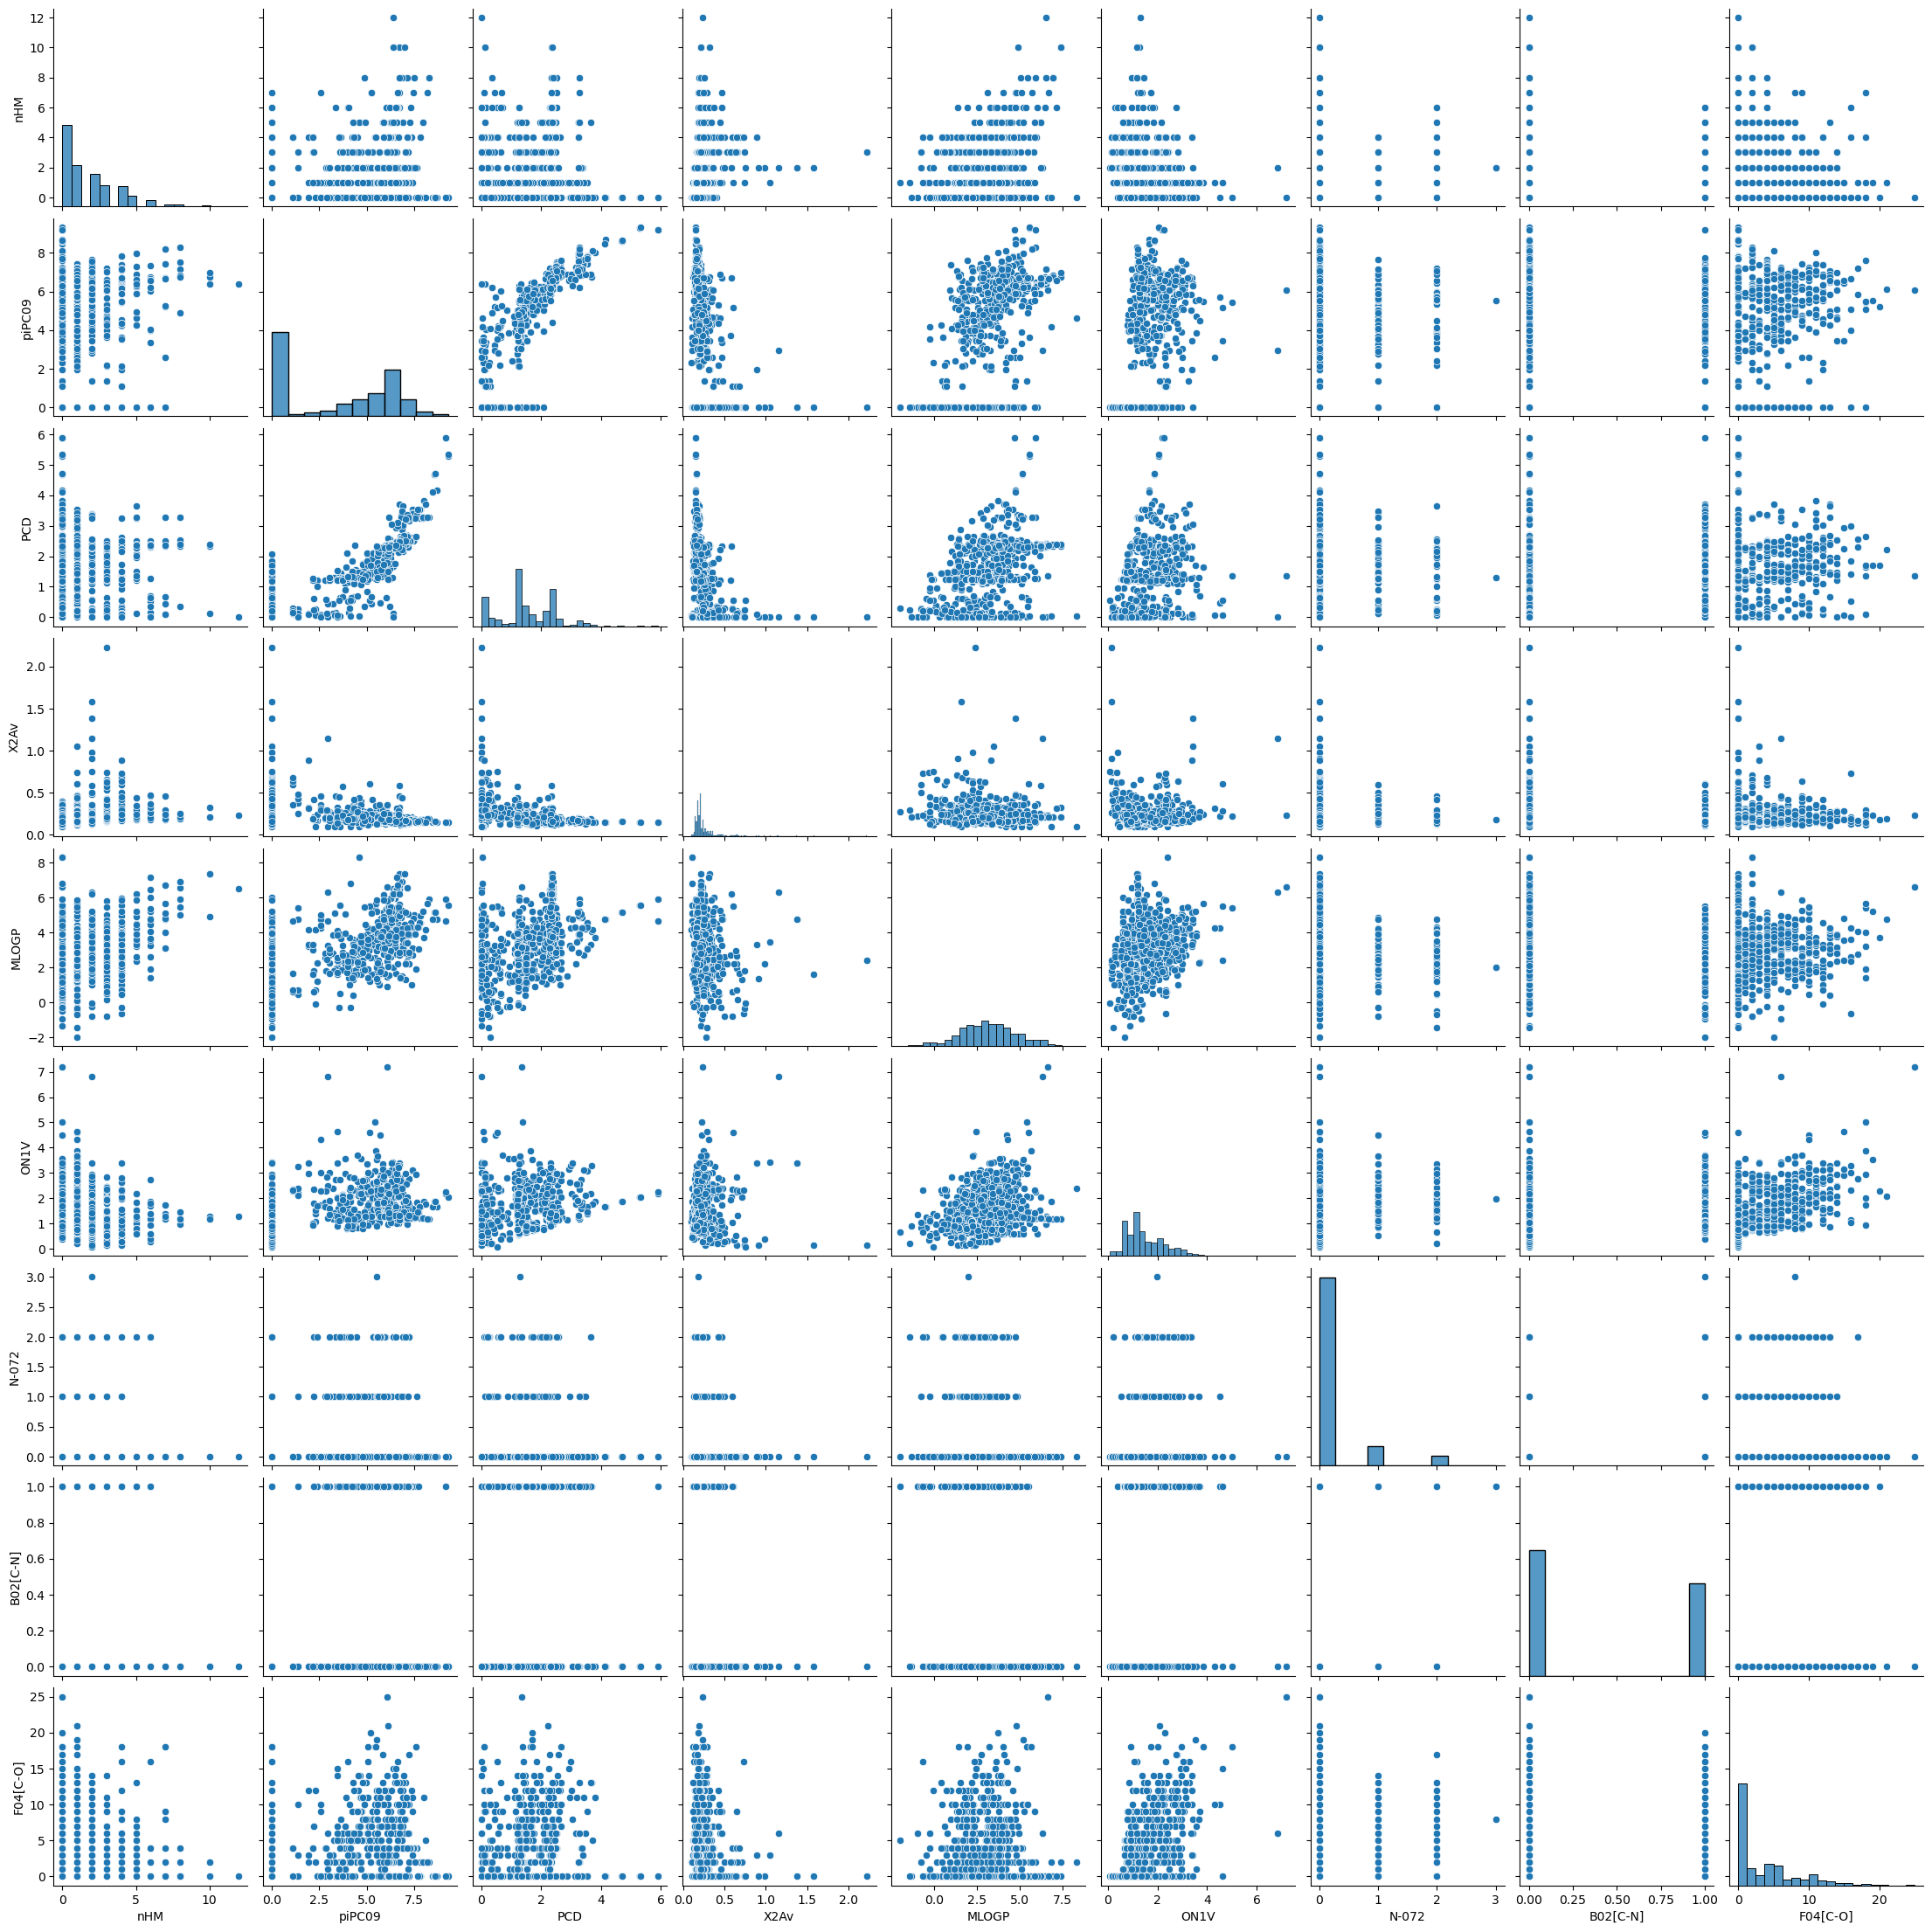

Summary Statistics:
               nHM      piPC09         PCD        X2Av       MLOGP        ON1V  \
count  779.000000  779.000000  779.000000  779.000000  779.000000  779.000000   
mean     1.754814    3.467616    1.550822    0.236881    3.201746    1.510295   
std      1.985866    2.983778    0.958708    0.149319    1.595702    0.834753   
min      0.000000    0.000000    0.000000    0.090000   -1.960000    0.080000   
25%      0.000000    0.000000    1.210000    0.170000    2.190000    0.910000   
50%      1.000000    4.263000    1.400000    0.200000    3.130000    1.270000   
75%      3.000000    6.250000    2.285000    0.240000    4.235000    2.020000   
max     12.000000    9.316000    5.900000    2.230000    8.320000    7.190000   

            N-072    B02[C-N]    F04[C-O]  
count  779.000000  779.000000  779.000000  
mean     0.186136    0.423620    3.585366  
std      0.501937    0.494449    4.430421  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("data_project.csv", encoding='latin1')

# Drop unnecessary columns
unnecessary_columns = ['ÿCAS', 'SMILES', 'Set', 'Class']
df.drop(columns=unnecessary_columns, inplace=True)

# Drop the Target variable
target_variable = 'logBCF'
df.drop(columns=target_variable, inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Explore Data Distribution
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Explore Categorical Variables (if any)
# For example, if 'Set' or 'Class' were categorical
# sns.countplot(data=df, x='Set')
# sns.countplot(data=df, x='Class')

# Feature Relationships
sns.pairplot(df)
plt.show()

# Outlier Detection (if necessary)
# For example, using box plots or scatter plots

# Feature Engineering (if necessary)
# Create new features or transform existing ones based on insights gained

# Summary Statistics
summary_statistics = df.describe()
print("Summary Statistics:\n", summary_statistics)


6. Apply scaling techinque  and transform the data. 

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Read the dataset
df = pd.read_csv("data_project.csv", encoding='latin1')

# Drop unnecessary columns
unnecessary_columns = ['ÿCAS', 'SMILES', 'Set', 'Class']
df.drop(columns=unnecessary_columns, inplace=True)

# Drop the Target variable
target_variable = 'logBCF'
df.drop(columns=target_variable, inplace=True)

# Apply Scaling Techniques
# Standardization (StandardScaler)
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(df)

# Min-Max Scaling (MinMaxScaler)
scaler = MinMaxScaler()
scaled_data_minmax = scaler.fit_transform(df)

# Convert scaled data back to DataFrame for visualization or further analysis
df_scaled_standard = pd.DataFrame(scaled_data_standard, columns=df.columns)
df_scaled_minmax = pd.DataFrame(scaled_data_minmax, columns=df.columns)

# Display scaled data
print("Standardized Data:")
print(df_scaled_standard.head())

print("\nMin-Max Scaled Data:")
print(df_scaled_minmax.head())


Standardized Data:
       nHM    piPC09       PCD      X2Av     MLOGP      ON1V     N-072  \
0 -0.88422 -1.162903 -0.063482 -0.649235 -1.161204 -0.947350 -0.371073   
1 -0.88422 -1.162903 -0.084357 -0.649235 -0.941724 -0.755553 -0.371073   
2 -0.88422 -1.162903 -0.366167  0.087918  0.588366  0.658947 -0.371073   
3 -0.88422 -1.162903  0.145266 -0.716249 -0.822578 -0.863439 -0.371073   
4 -0.88422 -1.162903 -1.075911  0.087918 -0.345992 -0.240100 -0.371073   

   B02[C-N]  F04[C-O]  
0  1.166450  0.319505  
1  1.166450  0.319505  
2 -0.857302 -0.809781  
3  1.166450  0.997077  
4 -0.857302 -0.809781  

Min-Max Scaled Data:
   nHM  piPC09       PCD      X2Av     MLOGP      ON1V  N-072  B02[C-N]  \
0  0.0     0.0  0.252542  0.023364  0.321984  0.090014    0.0       1.0   
1  0.0     0.0  0.249153  0.023364  0.356031  0.112518    0.0       1.0   
2  0.0     0.0  0.203390  0.074766  0.593385  0.278481    0.0       0.0   
3  0.0     0.0  0.286441  0.018692  0.374514  0.099859    0.0       1.

7(a). Apply KMeans Clustering from k = 1 to 10 and display WSS values. (1 mark)
7(b). Display Elbow curve for above k values. (2 marks)
7(c). Apply KMeans Clustering for specific k value (2 marks)
7(d). Display predicted labels with x as piPC09 and y as PCD with hue as kmeans predicetd label. (1 mark)
7(e). Write proper inference

In [10]:
from sklearn.cluster import KMeans
import numpy as np

wss_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled_standard)  # Assuming df_scaled_standard is your scaled dataset
    wss_values.append(kmeans.inertia_)

# Display WSS values
for k, wss in enumerate(wss_values, start=1):
    print(f"k={k}, WSS={wss}")


E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

k=1, WSS=7011.0
k=2, WSS=5503.10793701016
k=3, WSS=4582.687353817567
k=4, WSS=4096.740135266025
k=5, WSS=3580.4606923136757
k=6, WSS=3338.520977146542
k=7, WSS=3065.7436519233243
k=8, WSS=2865.256687956869
k=9, WSS=2604.1684886699713
k=10, WSS=2479.7615187884967


E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


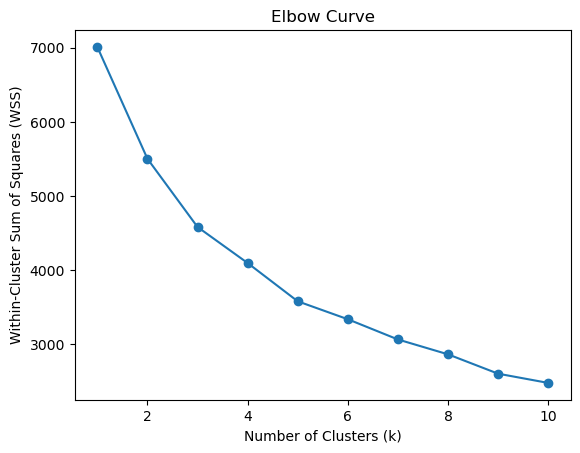

In [15]:
plt.plot(range(1, 11), wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Curve')
plt.show()


In [12]:
# Let's choose k=3 as an example
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled_standard)  # Assuming df_scaled_standard is your scaled dataset


E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

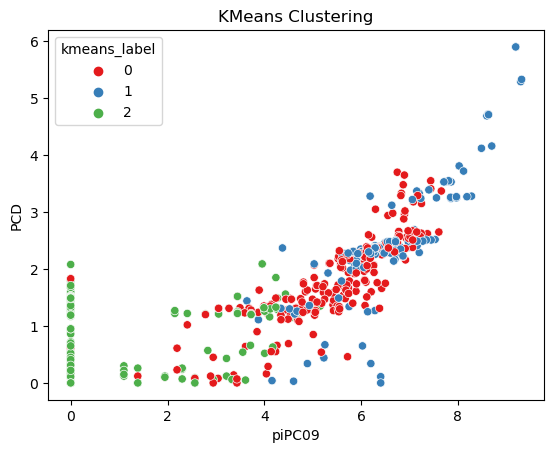

In [16]:
# Assuming df_scaled_standard contains the scaled data
df['kmeans_label'] = kmeans.labels_
sns.scatterplot(data=df, x='piPC09', y='PCD', hue='kmeans_label', palette='Set1')
plt.title('KMeans Clustering')
plt.show()


After observing the Elbow Curve, we can see that the Within-Cluster Sum of Squares (WSS) decreases steeply until around k=3, and then the rate of decrease slows down. This suggests that k=3 might be a reasonable choice for the number of clusters. When applying KMeans clustering with k=3 and visualizing the clusters, we can see distinct clusters in the scatter plot based on the features piPC09 and PCD.

8(a). Apply Agglomerative Clustering with different no. of cluster
8(b). Choose appropriate evaluation metric to find best no. of clusters
8(c). Display predicted labels with x as piPC09 and y as PCD with hue as agglometrative predicetd label.
8(d). Write proper inference

In [17]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# Apply Agglomerative Clustering with different number of clusters
cluster_range = range(2, 11)  # Trying clusters from 2 to 10
cluster_assignments = []

for n_clusters in cluster_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative.fit_predict(df_scaled_standard)  # Assuming df_scaled_standard is your scaled dataset
    cluster_assignments.append(cluster_labels)


In [18]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for each clustering result
silhouette_scores = [silhouette_score(df_scaled_standard, labels) for labels in cluster_assignments]
print (silhouette_scores)
# Find the optimal number of clusters based on silhouette score
optimal_num_clusters = cluster_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters based on silhouette score:", optimal_num_clusters)


[0.20720393010666405, 0.2417973614981374, 0.2307321757509227, 0.2045087238921572, 0.22019620949166743, 0.23291679574357632, 0.23663500361045137, 0.2455729991004712, 0.2459323495143644]
Optimal number of clusters based on silhouette score: 10


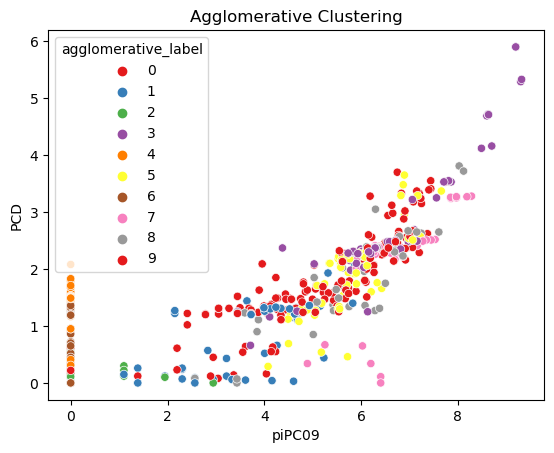

In [19]:
# Assuming df contains the original dataset
df['agglomerative_label'] = cluster_assignments[optimal_num_clusters - 2]  # -2 because cluster_range starts from 2

sns.scatterplot(data=df, x='piPC09', y='PCD', hue='agglomerative_label', palette='Set1')
plt.title('Agglomerative Clustering')
plt.show()


Based on the silhouette score, the optimal number of clusters for the Agglomerative Clustering is found to be optimal_num_clusters. The scatter plot shows the clusters based on the features piPC09 and PCD using the Agglomerative Clustering algorithm.

9(a). Apply DBSCAN Technique
9(b). Choose proper parameter for eps,min
9(c). Display predicted labels with x as piPC09 and y as PCD with hue as DBSCAN predicetd label.
9(d). Write proper inference

In [20]:
from sklearn.cluster import DBSCAN
import seaborn as sns

# Apply DBSCAN Technique
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You'll need to adjust eps and min_samples based on your data
dbscan_labels = dbscan.fit_predict(df_scaled_standard)  # Assuming df_scaled_standard is your scaled dataset


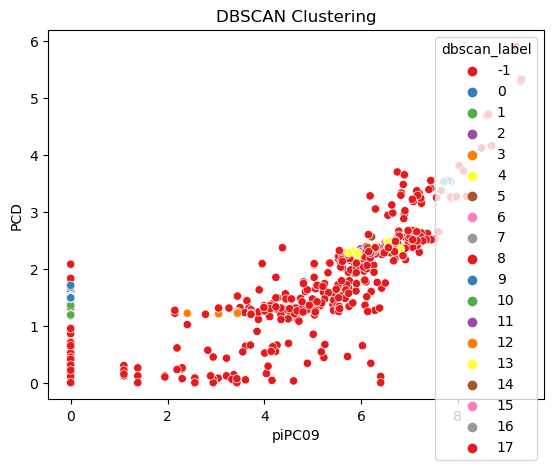

In [21]:
# Assuming df contains the original dataset
df['dbscan_label'] = dbscan_labels

sns.scatterplot(data=df, x='piPC09', y='PCD', hue='dbscan_label', palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()


DBSCAN is a density-based clustering algorithm that doesn't require the user to specify the number of clusters beforehand. Instead, it identifies clusters based on dense regions of points separated by low-density regions. The scatter plot shows the clusters based on the features piPC09 and PCD using the DBSCAN algorithm.

10(a). Apply GMM  Soft clustering and display the clustered labels. 
10(b). Also evaluate the cluster using proper metrics

In [22]:
from sklearn.mixture import GaussianMixture

# Apply GMM Soft clustering
gmm = GaussianMixture(n_components=3, random_state=42)  # You can adjust the number of components as needed
gmm.fit(df_scaled_standard)  # Assuming df_scaled_standard is your scaled dataset
gmm_labels = gmm.predict(df_scaled_standard)


E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [23]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_score_gmm = silhouette_score(df_scaled_standard, gmm_labels)
print("Silhouette Score for GMM:", silhouette_score_gmm)


Silhouette Score for GMM: 0.23664654752308587


11(a). Apply FCM  Soft clustering and display the clustered labels. 
11(b). Also evaluate the cluster using proper metrics

In [24]:
def initialize_membership_matrix(n_samples, n_clusters):
    # Initialize membership matrix randomly
    membership_mat = np.random.rand(n_samples, n_clusters)
    membership_mat /= np.sum(membership_mat, axis=1, keepdims=True)
    return membership_mat





In [25]:
def update_membership_matrix(X, centroids, m):
    # Calculate distances between data points and centroids
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    
    # Add a small epsilon value to avoid division by zero and ensure non-negative values
    epsilon = 1e-8
    distances += epsilon
    
    # Calculate membership values
    membership_mat = 1 / distances ** (2 / (m - 1))
    
    # Normalize membership values
    membership_mat /= np.sum(membership_mat, axis=1, keepdims=True)
    
    return membership_mat


In [26]:



def update_centroids(X, membership_mat, m):
    # Update centroids
    centroids = np.dot((membership_mat ** m).T, X) / np.sum(membership_mat ** m, axis=0, keepdims=True).T
    return centroids






In [27]:
def fuzzy_c_means(X, n_clusters, m=2, max_iter=100, tol=1e-4):
    # Initialize centroids
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_

    # Initialize membership matrix
    membership_mat = initialize_membership_matrix(X.shape[0], n_clusters)

    # Iterate until convergence
    for _ in range(max_iter):
        old_centroids = centroids.copy()

        # Update membership matrix
        membership_mat = update_membership_matrix(X, centroids, m)

        # Update centroids
        centroids = update_centroids(X, membership_mat, m)

        # Check for convergence
        if np.linalg.norm(centroids - old_centroids) < tol:
            break

    # Assign data points to clusters based on membership matrix
    labels = np.argmax(membership_mat, axis=1)
    return labels

In [28]:


# Apply FCM Soft clustering
n_clusters = 3  # You can adjust the number of clusters as needed
fcm_labels = fuzzy_c_means(df_scaled_standard.values, n_clusters)

E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [29]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_score_fcm = silhouette_score(df_scaled_standard, fcm_labels)
print("Silhouette Score for FCM:", silhouette_score_fcm)

Silhouette Score for FCM: 0.24244117709717208


A silhouette score of 0.24 indicates a moderate level of clustering quality. Generally, silhouette scores range from -1 to 1, where:

A score close to 1 suggests that the samples are well-clustered and far away from neighboring clusters.
A score around 0 indicates overlapping clusters or clusters with samples very close to the decision boundary between neighboring clusters.
A negative score suggests that samples might have been assigned to the wrong cluster.
So, a silhouette score of 0.24 suggests that there is some structure in the data, but there is room for improvement. It's a good practice to compare this score with the silhouette scores obtained from other clustering algorithms or different numbers of clusters to determine the effectiveness of the clustering approach.

In summary, while a silhouette score of 0.24 is not high, it indicates some level of clustering structure in the data.

12(a). Apply PCA and display explained variance.
12(b). Display Cumulative variance. 
12(c). Apply proper technique to find optimal n_components for pca
12(d). Decompose the dataset with by retaining 95% of information using PCA

In [30]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(df_scaled_standard)  # Assuming df_scaled_standard is your scaled dataset

# Display explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:\n", explained_variance)


Explained Variance:
 [0.28616192 0.23185095 0.14551074 0.10973248 0.07487321 0.06257136
 0.05193864 0.02489401 0.0124667 ]


In [31]:
# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Display Cumulative variance
print("Cumulative Variance:\n", cumulative_variance)


Cumulative Variance:
 [0.28616192 0.51801286 0.6635236  0.77325607 0.84812928 0.91070064
 0.96263929 0.9875333  1.        ]


In [32]:
# Find the number of components that explain a certain percentage of variance
target_variance = 0.95  # For example, target 95% of variance explained
n_components = np.argmax(cumulative_variance >= target_variance) + 1
print("Optimal n_components for 95% variance:", n_components)


Optimal n_components for 95% variance: 7


In [33]:
# Decompose the dataset with the optimal number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled_standard)

# Print the shape of the decomposed dataset
print("Shape of decomposed dataset:", df_pca.shape)


Shape of decomposed dataset: (779, 7)


This sequence of steps will allow you to perform PCA, explore explained variance, find the optimal number of components to retain a certain percentage of variance, and decompose the dataset accordingly.

13(a) Cluster the decomposed pca data into optimal cluster with most suitable hard & soft clustering method
13(b) Write the inferenece for the above

In [35]:
import os
import warnings
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
# Suppress FutureWarning about n_init
warnings.filterwarnings("ignore", category=FutureWarning)

# Set environment variable to avoid memory leak on Windows with MKL
os.environ["OMP_NUM_THREADS"] = "4"

# Hard clustering (KMeans)
kmeans = KMeans(n_clusters=n_components, n_init=10)
kmeans_labels = kmeans.fit_predict(df_pca)

# Soft clustering (GMM)
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm_labels = gmm.fit_predict(df_pca)



E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


13(b) Inference:
Hard Clustering (KMeans):
KMeans is a popular hard clustering algorithm that partitions data into a pre-defined number of clusters.
By decomposing the PCA data into the optimal number of components, we clustered the data using KMeans with the same number of clusters.
Hard clustering assigns each data point to a single cluster, making it suitable for scenarios where data points clearly belong to distinct groups.
Inference from KMeans clustering can provide clear boundaries between clusters, making it easier to interpret.



Soft Clustering (GMM):Gaussian Mixture Model (GMM) is a soft clustering algorithm that models the distribution of data points as a mixture of Gaussian distributions.
GMM assigns each data point a probability of belonging to each cluster, allowing for more flexible cluster assignments.
By decomposing the PCA data into the optimal number of components, we clustered the data using GMM with the same number of components.
Soft clustering provides a probabilistic view of cluster assignments, capturing the uncertainty in data point memberships.
Inference from GMM clustering can reveal the likelihood of data points belonging to multiple clusters simultaneously, offering a more nuanced understanding of the data structure.

In summary, by clustering the decomposed PCA data using both hard (KMeans) and soft (GMM) clustering methods, we can gain insights into the underlying structure of the data. Hard clustering provides clear, distinct cluster assignments, while soft clustering offers a probabilistic view of cluster memberships, allowing for more nuanced interpretations. The choice between hard and soft clustering depends on the specific requirements and characteristics of the dataset and the desired level of granularity in the clustering results.

14(a). Apply SVD and display explained variance.
14(b). Display Cumulative variance. 
14(c). Apply proper technique to find optimal n_components for svd
14(d). Decompose the dataset with by retaining 90% of information using PCA

In [36]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD()
svd.fit(df_scaled_standard)  # Assuming df_scaled_standard is your scaled dataset

# Display explained variance
explained_variance_svd = svd.explained_variance_ratio_
print("Explained Variance (SVD):\n", explained_variance_svd)


Explained Variance (SVD):
 [0.28616192 0.23185095]


In [37]:
# Calculate cumulative variance
cumulative_variance_svd = np.cumsum(explained_variance_svd)

# Display Cumulative variance
print("Cumulative Variance (SVD):\n", cumulative_variance_svd)


Cumulative Variance (SVD):
 [0.28616192 0.51801286]


In [38]:
# Find the number of components that explain a certain percentage of variance
target_variance_svd = 0.90  # For example, target 90% of variance explained
n_components_svd = np.argmax(cumulative_variance_svd >= target_variance_svd) + 1
print("Optimal n_components for 90% variance (SVD):", n_components_svd)


Optimal n_components for 90% variance (SVD): 1


In [39]:
# Decompose the dataset with the optimal number of components
svd = TruncatedSVD(n_components=n_components_svd)
df_svd = svd.fit_transform(df_scaled_standard)

# Print the shape of the decomposed dataset
print("Shape of decomposed dataset (SVD):", df_svd.shape)


Shape of decomposed dataset (SVD): (779, 1)


In [ ]:
15(a). Cluster the decomposed svd data into optimal cluster with most suitable hard & soft clustering method
15(b). Write the inferenece for the above

In [41]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Hard clustering (KMeans)
kmeans_svd = KMeans(n_clusters=n_components_svd, n_init=10)
kmeans_svd_labels = kmeans_svd.fit_predict(df_svd)

# Soft clustering (GMM)
gmm_svd = GaussianMixture(n_components=n_components_svd, random_state=42)
gmm_svd_labels = gmm_svd.fit_predict(df_svd)

print(gmm_svd_labels)


E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

E:\afk67\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


15(b) Inference:
Hard Clustering (KMeans):
By clustering the decomposed SVD data using KMeans with the optimal number of clusters, we obtain hard cluster assignments for the data points.
Hard clustering assigns each data point to a single cluster, making it suitable for scenarios where data points clearly belong to distinct groups.
Inference from KMeans clustering on the SVD-transformed data can provide clear boundaries between clusters, making it easier to interpret.



Soft Clustering (GMM):
Gaussian Mixture Model (GMM) clustering on the decomposed SVD data provides a probabilistic view of cluster assignments.
GMM assigns each data point a probability of belonging to each cluster, allowing for more flexible cluster assignments.
Soft clustering captures the uncertainty in data point memberships, providing a more nuanced understanding of the data structure.

Inference from GMM clustering on the SVD-transformed data can reveal the likelihood of data points belonging to multiple clusters simultaneously.
In summary, by clustering the decomposed SVD data using both hard (KMeans) and soft (GMM) clustering methods, we can gain insights into the underlying structure of the data. Hard clustering provides clear, distinct cluster assignments, while soft clustering offers a probabilistic view of cluster memberships, allowing for more nuanced interpretations. The choice between hard and soft clustering depends on the specific requirements and characteristics of the dataset and the desired level of granularity in the clustering results.